<a href="https://colab.research.google.com/github/YasirHabib/Deep-Learning-Advanced-Computer-Vision/blob/master/fashion_mnist_CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [0]:
class CNN():
  def __init__(self, size):
    self.size = size
    
  def fit(self, X, Y):
    K = len(set(Y))
    
    X, Y = shuffle(X, Y)
    
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D(),
        
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        
        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        
        Flatten(),
        Dense(self.size, activation='relu'),
        Dropout(0.2),
        Dense(K, activation='softmax')        
    ])
    
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    
    model.summary()
    
    EPOCHS = 15
    
    r = model.fit(X, Y, validation_split=0.33, epochs=EPOCHS, batch_size=32, shuffle=True)
    
    acc = r.history['acc']
    val_acc = r.history['val_acc']
    
    loss = r.history['loss']
    val_loss = r.history['val_loss']
    
    epochs_range = range(EPOCHS)
    
    plt.figure(figsize=(8,8))
    
    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()    

Mounted at /content/gdrive
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)         

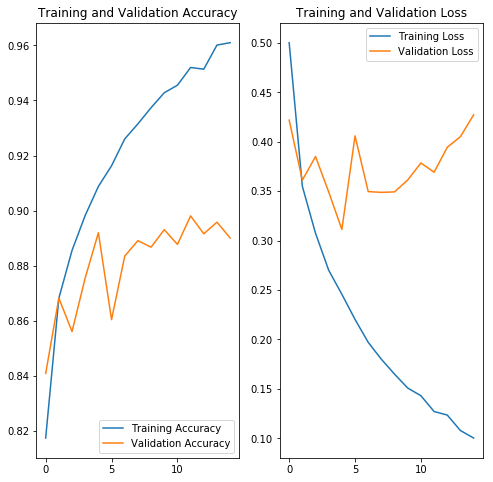

In [42]:
def main():
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
  
  df_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Deep Learning: Advanced Computer Vision/fashion-mnist_train.csv')
  
  data = df_data.values
  
  X = data[:,1:]
  Y = data[:,0]
  
  X = (X.reshape(-1,28,28,1) / 255).astype(np.float32)
  Y = Y.astype(np.int32)
  
  model = CNN(300)
  model.fit(X, Y)
  
if __name__ == '__main__':
  main()